In [7]:
import numpy as np
from tqdm import tqdm
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim import models
import pandas as pd
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jinbihui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [10]:
jin = pd.read_excel('xxxx/posts-rq1-Jin.xlsx')
liu = pd.read_excel('xxxx/posts-rq1-liu.xlsx')
stef = pd.read_excel('xxxx/differences.xlsx')

def convert(x):
    try:
        if str(x).lower() == 'yes':
            return 1
        else:
            return 0
    except:
        return np.nan

df = pd.merge(jin, liu, on='Id', how='outer')
df = pd.merge(df, stef, on='Id', how='outer')
df['Stefanos-choice'] = df['Stefanos'].apply(convert)
df['final'] = df['Stefanos-choice']+df['IsEnergyRelated_x']+df['IsEnergyRelated_y']  
df=df[df['final']>1]
documents = df[['Id','Title_x','Body_x','Tags_x']].rename(columns={'Id':'Id','Title_x':'Title','Body_x':'Body','Tags_x':'Tag'})


In [11]:
output_dataframe = documents

In [12]:
processed_docs = (documents['Title'] + '\n'+ documents['Body']).map(preprocess)

In [13]:
print(processed_docs[:10])
print(len(processed_docs))

0     [virtual, desktop, legaci, seldom, applic, won...
1     [power, effici, softwar, cod, typic, handheld,...
2     [reduc, power, consumpt, load, server, run, wi...
4     [softwar, perform, mcps, power, consum, emb, a...
7     [differ, multi, multi, core, hyper, thread, ex...
9     [measur, energi, consumpt, applic, window, mob...
10    [continu, wake, sleep, minim, power, usag, lin...
11    [main, loop, execut, thread, sleep, event, occ...
12    [build, small, code, host, server, home, hardw...
13    [binari, ternari, comput, state, object, immed...
dtype: object
985


In [14]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [15]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 applic
1 avail
2 box
3 calcul
4 certain
5 check
6 compani
7 concern
8 critic
9 custom
10 databas


In [16]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [17]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[40]

[(15, 1),
 (17, 1),
 (19, 1),
 (38, 2),
 (43, 2),
 (137, 1),
 (139, 1),
 (143, 1),
 (181, 1),
 (214, 1),
 (324, 1)]

In [18]:
print(len(bow_corpus))

985


In [19]:
bow_doc_4310 = bow_corpus[40]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 15 ("like") appears 1 time.
Word 17 ("need") appears 1 time.
Word 19 ("project") appears 1 time.
Word 38 ("consum") appears 2 time.
Word 43 ("devic") appears 2 time.
Word 137 ("relat") appears 1 time.
Word 139 ("status") appears 1 time.
Word 143 ("creat") appears 1 time.
Word 181 ("requir") appears 1 time.
Word 214 ("help") appears 1 time.
Word 324 ("anybodi") appears 1 time.


In [20]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=6, id2word=dictionary, passes=2, workers=2)

In [21]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.039*"energi" + 0.017*"usag" + 0.016*"time" + 0.015*"devic" + 0.014*"batteri" + 0.013*"code" + 0.012*"data" + 0.011*"work" + 0.010*"android" + 0.009*"know"
Topic: 1 
Words: 0.025*"locat" + 0.019*"batteri" + 0.017*"user" + 0.017*"applic" + 0.015*"android" + 0.014*"sleep" + 0.013*"updat" + 0.012*"run" + 0.012*"code" + 0.012*"like"
Topic: 2 
Words: 0.033*"sensor" + 0.020*"energi" + 0.015*"program" + 0.012*"code" + 0.012*"time" + 0.010*"usag" + 0.010*"profil" + 0.010*"function" + 0.009*"applic" + 0.009*"process"
Topic: 3 
Words: 0.028*"devic" + 0.016*"connect" + 0.016*"data" + 0.015*"time" + 0.013*"need" + 0.012*"read" + 0.012*"bluetooth" + 0.011*"batteri" + 0.011*"android" + 0.010*"question"
Topic: 4 
Words: 0.027*"energi" + 0.026*"android" + 0.018*"code" + 0.015*"time" + 0.014*"work" + 0.012*"want" + 0.012*"applic" + 0.012*"effici" + 0.012*"core" + 0.012*"know"
Topic: 5 
Words: 0.024*"applic" + 0.023*"measur" + 0.020*"energi" + 0.017*"work" + 0.014*"program" + 0.013*"ne

## Running LDA using TF-IDF

In [56]:
# lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [57]:
# for idx, topic in lda_model_tfidf.print_topics(-1):
#     print('Topic: {} Word: {}'.format(idx, topic))
#     print()

In [58]:
# processed_docs[40]

In [22]:
for index, score in sorted(lda_model[bow_corpus[40]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 7)))


Score: 0.9398185610771179	 
Topic: 0.028*"devic" + 0.016*"connect" + 0.016*"data" + 0.015*"time" + 0.013*"need" + 0.012*"read" + 0.012*"bluetooth"

Score: 0.012060828506946564	 
Topic: 0.027*"energi" + 0.026*"android" + 0.018*"code" + 0.015*"time" + 0.014*"work" + 0.012*"want" + 0.012*"applic"

Score: 0.012040930800139904	 
Topic: 0.024*"applic" + 0.023*"measur" + 0.020*"energi" + 0.017*"work" + 0.014*"program" + 0.013*"need" + 0.011*"batteri"

Score: 0.012032612226903439	 
Topic: 0.033*"sensor" + 0.020*"energi" + 0.015*"program" + 0.012*"code" + 0.012*"time" + 0.010*"usag" + 0.010*"profil"

Score: 0.012029245495796204	 
Topic: 0.039*"energi" + 0.017*"usag" + 0.016*"time" + 0.015*"devic" + 0.014*"batteri" + 0.013*"code" + 0.012*"data"

Score: 0.012017783708870411	 
Topic: 0.025*"locat" + 0.019*"batteri" + 0.017*"user" + 0.017*"applic" + 0.015*"android" + 0.014*"sleep" + 0.013*"updat"


## Getting optimal topic numbers

In [23]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [25]:
# num_topics = [5,10,15,20,25,30,35,40]
idea_topic_num_list=[]
for tune in tqdm(range(100)):
    num_topics = list(range(16)[1:])
    print(num_topics)
    LDA_models = {}
    LDA_topics = {}
    for i in num_topics:
        LDA_models[i] = gensim.models.LdaMulticore(bow_corpus, num_topics=i, id2word=dictionary, passes=10, workers=8)
        shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                                 num_words=10,
                                                 formatted=False)
        LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

    LDA_stability = {}
    for i in range(0, len(num_topics)-1):
        jaccard_sims = []
        for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
            sims = []
            for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
                sims.append(jaccard_similarity(topic1, topic2))    

            jaccard_sims.append(sims)    

        LDA_stability[num_topics[i]] = jaccard_sims

    mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]    

    coherences = [CoherenceModel(model=LDA_models[i], texts=processed_docs, dictionary=dictionary, coherence='c_v').get_coherence()\
                  for i in num_topics[:-1]]

    num_keywords = 7
    coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(num_keywords)[:-1]] # limit topic numbers to the number of keywords
    coh_sta_max = max(coh_sta_diffs)
    coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
    ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
    ideal_topic_num = num_topics[ideal_topic_num_index]
    idea_topic_num_list.append(ideal_topic_num)

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


  1%|▍                                        | 1/100 [01:22<2:16:34, 82.77s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


  2%|▊                                        | 2/100 [02:45<2:15:07, 82.73s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


  3%|█▏                                       | 3/100 [04:07<2:13:20, 82.48s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


  4%|█▋                                       | 4/100 [05:29<2:11:41, 82.31s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


  5%|██                                       | 5/100 [06:52<2:10:29, 82.42s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


  6%|██▍                                      | 6/100 [08:14<2:09:12, 82.48s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


  7%|██▊                                      | 7/100 [09:38<2:08:13, 82.72s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


  8%|███▎                                     | 8/100 [11:01<2:07:00, 82.83s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


  9%|███▋                                     | 9/100 [12:23<2:05:11, 82.55s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 10%|████                                    | 10/100 [13:44<2:03:26, 82.29s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 11%|████▍                                   | 11/100 [15:06<2:01:52, 82.16s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 12%|████▊                                   | 12/100 [16:29<2:00:39, 82.27s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


dyld[29860]: Assertion failed: (this->magic == kMagic), function matchesPath, file Loader.cpp, line 154.

 13%|█████▏                                  | 13/100 [17:51<1:59:24, 82.35s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 14%|█████▌                                  | 14/100 [19:14<1:58:10, 82.44s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 15%|██████                                  | 15/100 [20:36<1:56:34, 82.29s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 16%|██████▍                                 | 16/100 [21:58<1:55:00, 82.14s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 17%|██████▊                                 | 17/100 [23:21<1:54:03, 82.46s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 18%|███████▏                                | 18/100 [24:43<1:52:41, 82.46s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 19%|███████▌                                | 19/100 [26:06<1:51:35, 82.66s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 20%|████████                                | 20/100 [27:29<1:50:06, 82.59s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 21%|████████▍                               | 21/100 [28:51<1:48:30, 82.41s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 22%|████████▊                               | 22/100 [30:13<1:46:57, 82.28s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 23%|█████████▏                              | 23/100 [31:35<1:45:39, 82.33s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 24%|█████████▌                              | 24/100 [32:58<1:44:22, 82.40s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 25%|██████████                              | 25/100 [34:21<1:43:07, 82.51s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 26%|██████████▍                             | 26/100 [35:43<1:41:36, 82.38s/it]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


 26%|█████████▌                           | 26/100 [1:17:03<3:39:18, 177.82s/it]


KeyboardInterrupt: 

In [ ]:
print(len(LDA_models))
print(idea_topic_num_list)
print('Mode: ',max(set(idea_topic_num_list), key=idea_topic_num_list.count))
print('Average: ', sum(idea_topic_num_list)/len(idea_topic_num_list))

## After 100 times tuning, the mode is 6 and average is 5.67 of optimal topic number within 15 topics

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
num_topics = list(range(16)[1:])
print(num_topics)
LDA_models = {}
LDA_topics = {}
for i in num_topics:
    LDA_models[i] = gensim.models.LdaMulticore(bow_corpus, num_topics=i, id2word=dictionary, passes=10, workers=8)
    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=10,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

LDA_stability = {}
for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
        sims = []
        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))    

        jaccard_sims.append(sims)    

    LDA_stability[num_topics[i]] = jaccard_sims

mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]    

coherences = [CoherenceModel(model=LDA_models[i], texts=processed_docs, dictionary=dictionary, coherence='c_v').get_coherence()\
              for i in num_topics[:-1]]

num_keywords = 7
coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(num_keywords)[:-1]] # limit topic numbers to the number of keywords
coh_sta_max = max(coh_sta_diffs)
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


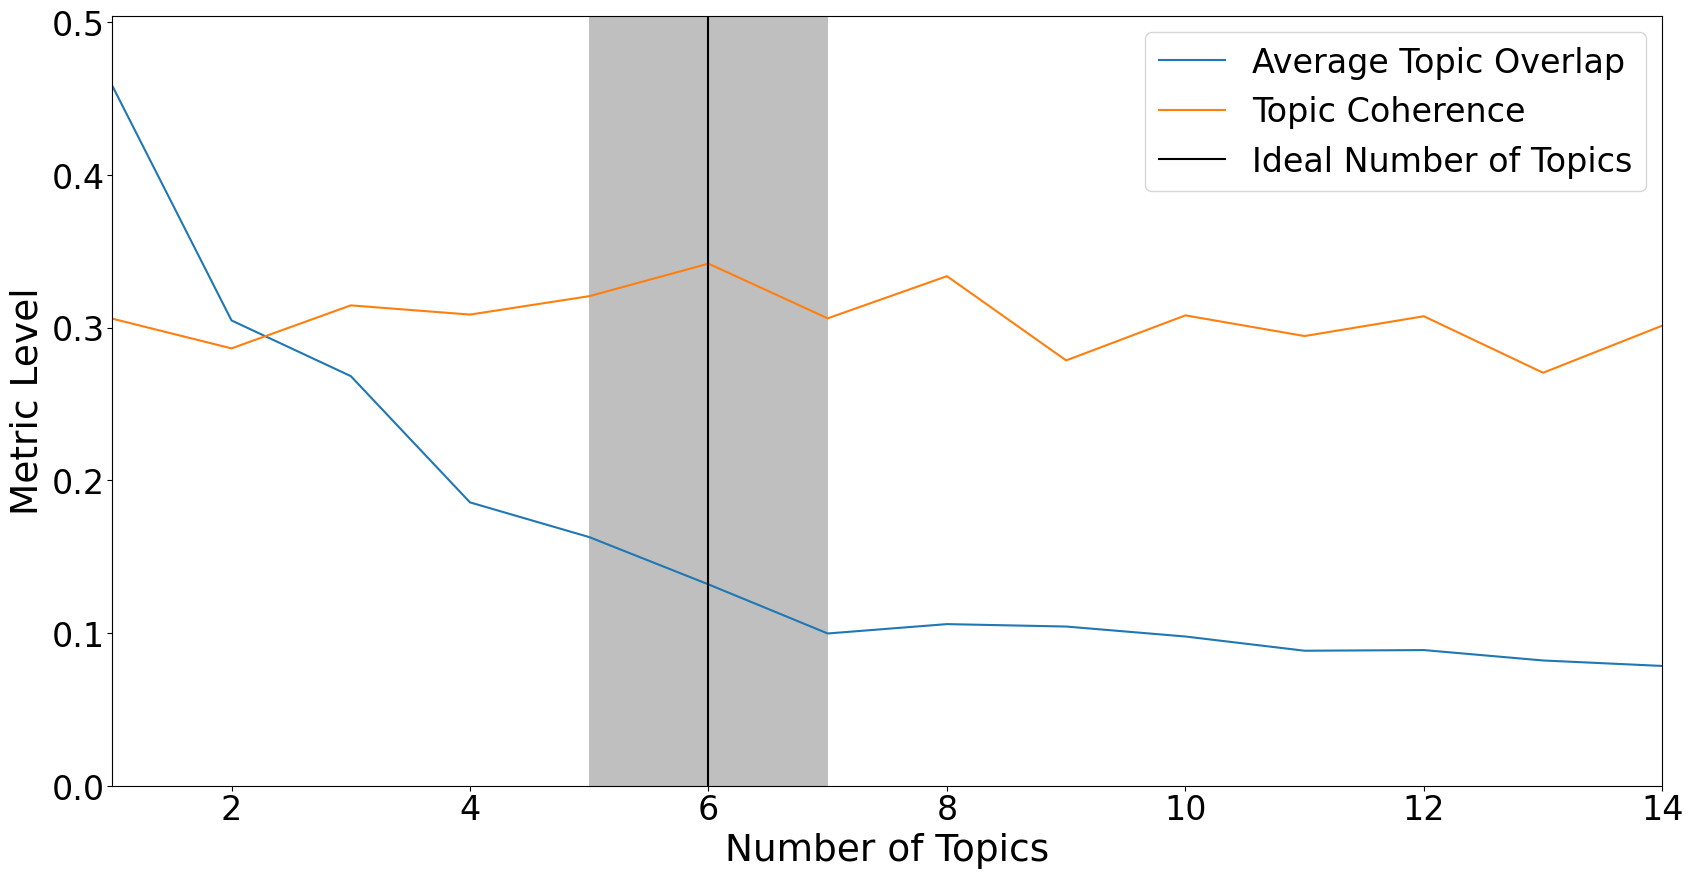

In [32]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
ax.set_ylim([0, y_max])
ax.set_xlim([1, num_topics[-1]-1])
                
# ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=27)
ax.set_xlabel('Number of Topics', fontsize=27)
# sns.set(font_scale=2)
ax.tick_params(axis ='both', which ='major', 
               labelsize = 24, pad = 2)
plt.legend(fontsize=24)
plt.show()   
# plt.savefig('/Users/jinbihui/Downloads/jaccard.png', dpi=1000)